In [1]:
from slsim.Sources.source import Source
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
source_dict_bpl_agn = {
    "point_source_type": "quasar",
    "extended_source_type": "single_sersic",
    "z": 1.5,
    "n_sersic": 4,
    "angular_size": 0.35,
    "e1": 0.1,
    "e2": 0.05,
    "ps_mag_i": 18,
    "MJD": np.linspace(1, 500, 500),
    "r_out": 1000,
    "corona_height": 10,
    "r_resolution": 500,
    "inclination_angle": 10,
    "black_hole_mass_exponent": 8.5,
    "random_seed": 40,
}

In [4]:
variable_agn_kwarg_dict = {
    "length_of_light_curve": 3000,
    "time_resolution": 1,
    "log_breakpoint_frequency": 1,
    "low_frequency_slope": 1,
    "high_frequency_slope": 3,
    "standard_deviation": 1,
}

In [5]:
source_bpl_agn = Source(
    variability_model="light_curve",
    kwargs_variability={"agn_lightcurve", "g", "i", "z"},
    lightcurve_time=np.linspace(0, 500, 200),
    cosmo=cosmo,
    agn_driving_variability_model="bending_power_law",
    agn_driving_kwargs_variability=variable_agn_kwarg_dict,
    **source_dict_bpl_agn
)

In [6]:
light_curves = source_bpl_agn._source._point_source.light_curve

{'length_of_light_curve': 3000, 'time_resolution': 1, 'log_breakpoint_frequency': 1, 'low_frequency_slope': 1, 'high_frequency_slope': 3, 'standard_deviation': 1} test AGN variability model


/Users/sibirrer/opt/anaconda3/envs/sim-pipeline/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/sibirrer/opt/anaconda3/envs/sim-pipeline/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/sibirrer/opt/anaconda3/envs/sim-pipeline/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/sibirrer/opt/anaconda3/envs/sim-pipeline/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


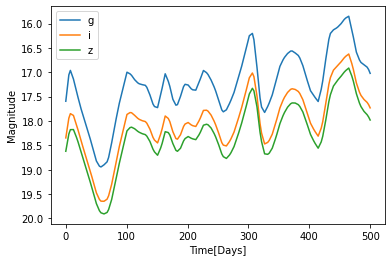

In [7]:
plt.plot(
    light_curves["g"]["MJD"],
    light_curves["g"]["ps_mag_g"],
    label="g",
)
plt.plot(
    light_curves["i"]["MJD"],
    light_curves["i"]["ps_mag_i"],
    label="i",
)
plt.plot(
    light_curves["z"]["MJD"],
    light_curves["z"]["ps_mag_z"],
    label="z",
)


plt.legend()

# plt.ylim(18, 22)
# plt.xlim(100, 200)
plt.gca().invert_yaxis()
plt.ylabel("Magnitude")
plt.xlabel("Time" "[Days]")
plt.show()

In [8]:
# allow for random bpl to be generated. Note that the random seed was already set, so technically every run is predetermined
if "random_seed" in source_dict_bpl_agn.keys():
    del source_dict_bpl_agn["random_seed"]
new_source = Source(
    variability_model="light_curve",
    kwargs_variability={"agn_lightcurve", "g", "r", "i", "z"},
    lightcurve_time=np.linspace(0, 1000, 500),
    cosmo=cosmo,
    **source_dict_bpl_agn
)
new_light_curves = new_source._source._point_source.light_curve

{'length_of_light_curve': 1000.0, 'time_resolution': 1, 'log_breakpoint_frequency': -1.8971039286670235, 'low_frequency_slope': 0.582820370918943, 'high_frequency_slope': 1.292160803759693, 'standard_deviation': 0.3685302683392123} test AGN variability model


mean +/- dev i : 18.0 +/- 0.2
mean +/- dev g : 16.97 +/- 0.22
mean +/- dev z : 18.33 +/- 0.19
mean +/- dev r : 17.55 +/- 0.21


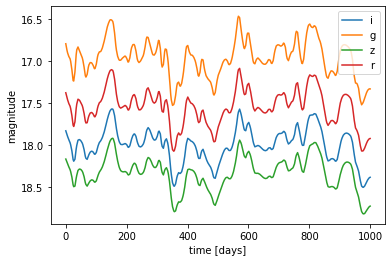

In [9]:
fig, ax = plt.subplots()
for key in new_light_curves.keys():
    ax.plot(
        new_light_curves[key]["MJD"],
        new_light_curves[key]["ps_mag_" + str(key)],
        label=key,
    )
    print(
        "mean +/- dev",
        key,
        ":",
        round(np.mean(new_light_curves[key]["ps_mag_" + str(key)]), 2),
        "+/-",
        round(np.std(new_light_curves[key]["ps_mag_" + str(key)]), 2),
    )
ax.legend(loc=1)
ax.invert_yaxis()
ax.set_xlabel("time [days]")
ax.set_ylabel("magnitude")
plt.show()